In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import time
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline 

In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
X = tf.placeholder(tf.float32, shape=[None, 784],name="input")
# ランダムノイズ用
delta = tf.placeholder(tf.float32,shape=[None, 784], name="delta_noise")

In [4]:
stddev = np.sqrt(1.0 / 392)
h_W = tf.Variable(tf.truncated_normal([784,392], stddev=stddev)) 
h_b = tf.Variable(tf.constant(0.1, shape=[392]))
# ノイズを乗せたものを入力として渡す
h_y = tf.nn.relu(tf.matmul(X+delta, h_W) + h_b)

In [5]:
stddev = np.sqrt(1.0 / 784)
W = tf.Variable(tf.truncated_normal([392,784], stddev=stddev)) 
b = tf.Variable(tf.constant(0.1, shape=[784]))
y = tf.nn.xw_plus_b(h_y,W,b,name="output")

In [6]:
### 損失
### ノイズを乗せる前の入力を教師データとする
loss = tf.reduce_mean(tf.pow(y - X, 2))

### 学習op
optimizer = tf.train.AdamOptimizer(1e-4)
train_step = optimizer.minimize(loss)

In [7]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 20
start = time.time()
for i in range(3000):
    I = np.identity(28).reshape(28*28)
    noise = np.random.normal(0,2*I,(batch_size,784))
    
    batch = mnist.train.next_batch(batch_size)
    sess.run(train_step,feed_dict={X: batch[0],delta:noise})
    if i % 500 == 0:
        train_loss = sess.run(loss, feed_dict={X: batch[0],delta:noise})
        print("[Train] step: %d, loss: %f" % (i, train_loss))
        print("Time : %f" % (time.time() - start))

[Train] step: 0, loss: 0.161017
Time : 0.159875
[Train] step: 500, loss: 0.043470
Time : 2.804301
[Train] step: 1000, loss: 0.029375
Time : 5.650427
[Train] step: 1500, loss: 0.020120
Time : 8.177775
[Train] step: 2000, loss: 0.013659
Time : 10.770315
[Train] step: 2500, loss: 0.010942
Time : 13.193701


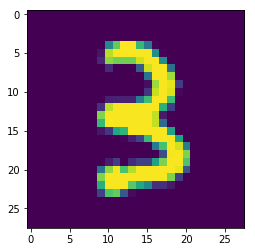

In [8]:
orig_img = list(mnist.test.images[753])
orig_img = np.array(orig_img)
plt.imshow(orig_img.reshape(28,28))

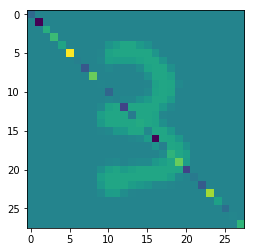

In [9]:
# ノイズありの画像を見る
I = np.identity(28).reshape(28*28)
noise = np.random.normal(0,2*I,(100,784))
noise_img = orig_img.copy()
noise_img += noise[8]
plt.imshow(np.array(noise_img).reshape(28,28))

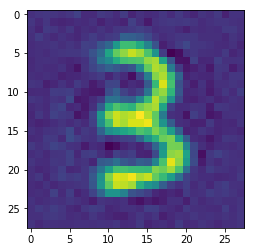

In [11]:
decode_img = sess.run(y,feed_dict={X:[orig_img.reshape(28*28)],delta:[noise[8]]})
# 復元結果
plt.imshow(np.array(decode_img).reshape(28,28))

In [12]:
# ソルトペッパーノイズでの復元はどうなるか確認する
r = np.random.random(28*28)     
# 破壊的操作を行わないように値だけコピー
salt_pepper_img = list(mnist.test.images[315])
salt_pepper_img = np.array(salt_pepper_img)

In [13]:
for i in range(0,28):
    for j in range(0,28):
        if r[i+j*28] < 0.3:
            salt_pepper_img[i+j*28] = 0.4

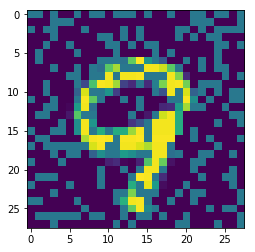

In [14]:
# ノイズありの入力画像
plt.imshow(salt_pepper_img.reshape(28,28))

In [15]:
zero = np.zeros(28*28)
zero = zero.astype(np.float32)

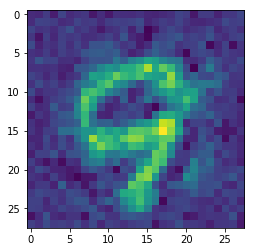

In [16]:
# 入力自体にノイズが加わっているため、deltaは0の行列に設定する
decode_img2 = sess.run(y,feed_dict={X:[salt_pepper_img],delta:[zero]})
# 復元結果
plt.imshow(np.array(decode_img2).reshape(28,28))